# Normalization Demo


In [ ]:
import numpy as np
data = np.array([10,20,30,40,50,1000]) # 1000 is an outlier - Outliers are data points that are significantly different from the rest of the data.

# Min-Max Scaling: Scales values between 0 and 1
def min_max_scaling(data):
  max = np.max(data)
  min = np.min(data)
  return (data-min)/(max - min)

# Z-Score Standardization: Mean = 0, Standard Deviation = 1
def z_score_standardization(data):
  mean = np.mean(data)
  std_deviation = np.std(data)
  return (data-mean)/std_deviation

min_max_scaled_data = min_max_scaling(data)
z_score_standardized_data = z_score_standardization(data)

print(f'Original Data: {data}')
print(f'Max-min scaled Data: {min_max_scaled_data}')
print(f'Z-score standardized Data: {z_score_standardized_data}')

Original Data: [  10   20   30   40   50 1000]
Max-min scaled Data: [0.         0.01010101 0.02020202 0.03030303 0.04040404 1.        ]
Z-score standardized Data: [-0.50221883 -0.47457376 -0.44692869 -0.41928361 -0.39163854  2.23464343]


# Example 1 - House Price Prediction (Regression)

## Synthetic dataset

In [ ]:
from re import VERBOSE
# Example 1 - House Price Prediction (Regression) with Synthetic dataset
# Predict house prices based on 10 numerical features

import tensorflow as tf
import numpy as np
from tensorflow.keras import layers,models

# Generate synthetic dataset (1000 samples, 10 features)
np.random.seed(42)
X_train = np.random.rand(1000,10)
y_train = np.random.rand(1000) * 500000 # House prices between 0-500K

# Generate test dataset (200 samples)
X_test = np.random.rand(200,10)
y_test = np.random.rand(200) * 500000
# Build model
model = models.Sequential([
    layers.Dense(64,activation='relu',input_shape=(10,)),
    layers.Dense(32,activation='relu'),
    layers.Dense(1)  # Single output for regression
])
# Compiling the model
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
# Training the model
model.fit(X_train,y_train,epochs=20,batch_size=32,verbose=1)
# Evaluate the model
test_loss,test_mae = model.evaluate(X_test,y_test)

print(f' Test MAE:${test_mae:.2f}')
# Predict a random houseprice
random_sample = np.random.rand(1,10)
predicted_price = model.predict(random_sample)
print(f'Predicted Price for Random Sample: ${predicted_price[0][0]:.2f}')

# MAE is around 243K - 245K, which means on average, the predictions are off by nearly half of the actual house price.
# This is very bad because an error of $243K in a price range of $500K means the model is almost random.
# The dataset is completely random, meaning there is no real pattern for the model to learn.
# The model is guessing house prices randomly, which is why MAE is so large.
# In short, bad model


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 84982595584.0000 - mae: 252982.5938
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 85918089216.0000 - mae: 257775.4688
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83887521792.0000 - mae: 250283.1250
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 83676422144.0000 - mae: 253247.4062
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 87043252224.0000 - mae: 258080.7812
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 84063567872.0000 - mae: 251758.5312
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 86645383168.0000 - mae: 258333.1250
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 84344872960.0000 - mae: 252910.8594
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81582153728.0000 - mae: 249218.9531
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83093266432.0000 - mae: 250086.0312
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 

## Synthetic dataset and Normalization


In [ ]:
import numpy as np
import tensorflow as ty
from tensorflow.keras import layers,models

# Generate synthetic dataset (1000 samples, 10 features) in [0,1] range
np.random.seed(42)
X_train = np.random.rand(1000,10)
y_train = np.random.rand(1000) # Target values in range 0-1

X_test = np.random.rand(200,10)
y_test = np.random.rand(200)

# Create a model
model = models.Sequential([
    layers.Dense(64,activation='relu',input_shape=(10,)),
    layers.Dense(32,activation='relu'),
    layers.Dense(1) # Output
])

# Compile model
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
# Train the model
model.fit(X_train,y_train,epochs=20,batch_size=32,verbose=1)
# Evaluate the model
test_loss,test_mae = model.evaluate(X_test,y_test)
print(f'Test MAE (Normalized): {test_mae:.4f}')
# Predict a sample pricing
sample_input = np.random.rand(1,10)
sample_prediction = model(sample_input)
print(f'Predicted Housing Price (Normalized) : {sample_prediction[0][0]:.4f}')
# This is again a bad model because we are still training on random values (just normalised values)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3306 - mae: 0.4816
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0903 - mae: 0.2535
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0859 - mae: 0.2503
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0871 - mae: 0.2528
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0807 - mae: 0.2433
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0857 - mae: 0.2521
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0852 - mae: 0.2528
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0825 - mae: 0.2465
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0812 - mae: 0.2446
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0806 - mae: 0.2449
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0802 - mae: 0.2434
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0769 - mae: 0.2381
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

### Using Scikitlearn Dataset

In [27]:

# House Price Prediction (Regression) with Dataset
import tensorflow as ty
import numpy as np
from tensorflow.keras import layers,models
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load California housing dataset
data = fetch_california_housing()
X,y = data.data,data.target  # Features and target (median house value in 100,000s)


print(f"Target Value Range (in 100,000s): Min = {y.min():.2f}, Max = {y.max():.2f}, Mean = {y.mean():.2f}")

# Split data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(f'X-shape {X_train.shape}')
# Normalize features for better training stability - Z-Score Standardization / Standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Compute mean & std from training data, then scale
X_test = scaler.transform(X_test) # Use the same scaling parameters to transform test data

# We use the same mean and standard deviation (computed from X_train) to scale X_test
# This ensures that both training and test data follow the same distribution

# If we include X_test when computing mean and standard deviation, the model gets information from the test set before training
# This is called data leakage, which can lead to unrealistically good performance and poor generalization to new data
# Test data should only be used for evaluation after the model is trained

# In real-world applications, new data arrives after training. We do not get to recompute the mean and std for each new data point
# The model should be able to handle unseen data using the same scaling applied during training

# Build model
model = models.Sequential([
    layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    layers.Dense(32,activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam',loss='mae',metrics=['mse'])

# Fit the model
model.fit(X_train,y_train,epochs=20,batch_size=32,verbose=1)

# Evaluate the model
test_loss,test_mae = model.evaluate(X_test,y_test)
print(f'Test MAE: ${test_mae*100000:.2f}')

# Make a prediction
sample_input = np.expand_dims(X_test[0],axis=0) # adds a new axis (dimension) to a NumPy array. Specifically: X_test[0] is one single test example – it's a 1D array of features. np.expand_dims(X_test[0], axis=0) turns it into a batch of 1 (a 2D array).
sample_prediction = model.predict(sample_input)
print(f'Predicted Housing Price: ${sample_prediction[0][0]*100000:.2f}')


Target Value Range (in 100,000s): Min = 0.15, Max = 5.00, Mean = 2.07
X-shape (16512, 8)
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8957 - mse: 1.7076
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4404 - mse: 0.4296
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4218 - mse: 0.3899
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4076 - mse: 0.3817
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3954 - mse: 0.3470
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3913 - mse: 0.3471
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3790 - mse: 0.3317
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3793 - mse: 0.3309
Epoch 9/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3718 - mse: 0.3175
Epoch 10/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3680 - mse: 0.3129
Epoch 11/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3624 - mse: 0.3034
Epoch 12/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3583 - mse: 0.2982
Epoch 13/20
516/516 ━━━━━━━━━━━━━━━━

## Example 2 - Sentiment Analysis (Binary Classification)

### Without Embedding Layer

In [28]:
# Example 2 - Sentiment Analysis (Binary Classification) - Without Embedding Layer
# Classify whether a review is positive or negative

import tensorflow as tf
import numpy as np
from tensorflow.keras import layers,models

(X_train,y_train),(X_test,y_test) = tf.keras.datasets.imdb.load_data(num_words=10000) # num_words -->  Only keep the top 10,000 most frequent words in the dataset

# IMDB reviews have different lengths, but Dense expects a fixed number of neurons
# We are ensuring every input is exactly 200 words.

# Pad sequences to ensure fixed-length inputs

from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(X_train,maxlen=200)
X_test = pad_sequences(X_test,maxlen=200)
print(f'X-shape {X_train.shape}')
# Craete a model
model = models.Sequential([
    layers.Dense(128,activation='relu',input_shape=(200,)),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid') # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train,y_train,epochs=5,batch_size=512)

# Evaluate the model
test_loss,test_accuracy = model.evaluate(X_test,y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

# Prediction
sample_prediction = model.predict(X_test[0:1])
print('Predicted Sentiments','Positive' if sample_prediction[0][0] > 0.5 else 'Negative')



X-shape (25000, 200)
Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5091 - loss: 226.6496
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5251 - loss: 60.9238
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5498 - loss: 36.4117
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5697 - loss: 23.4961
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5919 - loss: 16.4156
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5031 - loss: 22.8342
Test Accuracy: 50.58%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted Sentiments Positive


### With Embedding Layer


The `Embedding` layer **transforms integer word indices into dense vector representations**.

### **Word Index Representation (Before Embedding)**
In the IMDB dataset, words are represented as **integer indices** based on their frequency in the dataset.  
For example, a movie review:  

**Original Sentence:**  
*"The movie was amazing, I loved it!"*  

**Tokenized & Indexed Representation:**  
```python
[10, 482, 21, 345, 7, 99, 4]
```
Here:  
- `10` → "The"  
- `482` → "movie"  
- `21` → "was"  
- `345` → "amazing"  
- `7` → "I"  
- `99` → "loved"  
- `4` → "it"  

👉 The model **does not understand the meaning** of these numbers. It only sees them as integers.

---

### **What Embedding Does**
Instead of treating `10`, `482`, `21`, etc., as just numbers, an **embedding layer** converts each of them into a **dense vector** of real numbers.  

```python
layers.Embedding(input_dim=10000, output_dim=128, input_length=200)
```
- **`input_dim=10000`** → Vocabulary size (top 10,000 words)  
- **`output_dim=128`** → Each word index gets mapped to a **128-dimensional vector**  
- **`input_length=200`** → Each review is padded to 200 words  

For example, the word index `10` (which represents "The") might be mapped to:  
```python
[0.12, -0.25, 0.78, ..., 0.05]  # A 128-dimensional vector
```
Each word in the sentence gets a similar vector.

---

### **Why Is This Useful?**
- **Captures Word Meaning** → Similar words will have similar vectors.  
- **Avoids Numeric Misinterpretation** → Without embeddings, the model might think `99 > 10`, which makes no sense for words.  
- **Enables Word Relationships** → Words like `"king"` and `"queen"` will have similar embeddings.  

---

### **Example: Before vs After Embedding**
**Before Embedding (Word Indices)**  
```python
[10, 482, 21, 345, 7, 99, 4]  # Just numbers
```

**After Embedding (Word Vectors, Each of Size 128)**  
```python
[
  [0.12, -0.25, 0.78, ..., 0.05],   # Word 10
  [0.34, 0.67, -0.12, ..., -0.89],  # Word 482
  [0.08, 0.15, -0.32, ..., 0.40],   # Word 21
  ...
]
```
Each word now has a **dense vector representation** that captures its meaning.  

In [30]:
# Example 2 - Sentiment Analysis (Binary Classification) - With Embedding Layer

import tensorflow as tf
from tensorflow.keras import layers,models

(X_train,y_train),(X_test,y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)
# Pad sequences to ensure fixed-length inputs
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(X_train,maxlen=200)
X_test = pad_sequences(X_test,maxlen=200)

# Build model using only Dense layers with an Embedding layer
model = models.Sequential([
    layers.Embedding(input_dim=10000,output_dim=128,input_length=200), # Converts word indices to vectors
    layers.Flatten(),   # Flatten embeddings into a 1D vector
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid') # Binary classification

])

# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Train the model
model.fit(X_train,y_train,epochs=5,batch_size=512)

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 386ms/step - accuracy: 0.5940 - loss: 0.6460
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 464ms/step - accuracy: 0.9221 - loss: 0.2038
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 415ms/step - accuracy: 0.9927 - loss: 0.0392
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 351ms/step - accuracy: 0.9993 - loss: 0.0064
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 376ms/step - accuracy: 0.9999 - loss: 0.0013
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8478 - loss: 0.5271
Test accuracy: 85.03%


## Example 3 - Breast Cancer Prediction (Binary Classification)

(455, 30)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5915 - loss: 0.6707 - val_accuracy: 0.9649 - val_loss: 0.3407
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9282 - loss: 0.3213 - val_accuracy: 0.9737 - val_loss: 0.1905
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9603 - loss: 0.1950 - val_accuracy: 0.9825 - val_loss: 0.1254
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9574 - loss: 0.1478 - val_accuracy: 0.9912 - val_loss: 0.0941
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9657 - loss: 0.1141 - val_accuracy: 0.9825 - val_loss: 0.0768
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9803 - loss: 0.0932 - val_accuracy: 0.9825 - val_loss: 0.0681
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9801 - loss: 0.0739 - val_accuracy: 0.9825 - val_loss: 0.0656
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9750 - loss: 0.0821 - val_accuracy: 0.9912 - val_lo

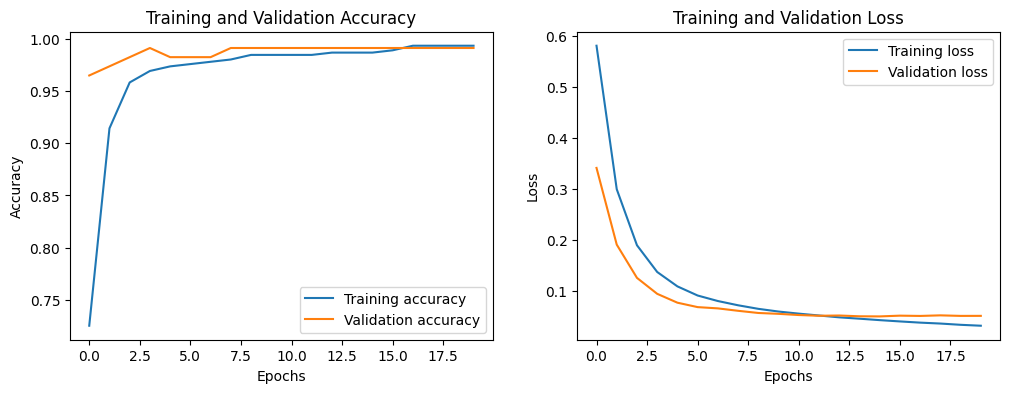

In [12]:
# The Breast Cancer dataset from Scikit-Learn contains 569 samples with 30 numerical features extracted
# from digitized images of breast mass tumors. The goal is to classify tumors as malignant (1) or benign (0)
# based on these features. The dataset was originally curated from the Wisconsin Diagnostic Breast Cancer (WDBC)
# dataset and is commonly used for binary classification tasks in machine learning.

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X,y = data.data,data.target

# Split into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
# Create model
model = models.Sequential([
    layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    layers.Dense(32,activation='relu'),
    layers.Dense(1,activation='sigmoid') # Binary classification
])
# Compile model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# Train model
history = model.fit(X_train,y_train,epochs=20,batch_size=32,validation_data=(X_test,y_test))  # using test set as validation during training Monitor validation loss/accuracy on X_test, y_test each epoch. Returns history.history['val_loss'], history.history['val_accuracy'].
#Evaluate model
test_loss,test_Accuracy = model.evaluate(X_test,y_test)
print(f'Test Accuracy: {test_Accuracy*100:.2f}%')
print(history.history.keys())
# Plot accuracy and loss using Matplotlib
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)  # telling Matplotlib how to organize multiple plots in a single figure plt.subplot(nrows, ncols, index)
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


## Example 4 - Wine Quality Prediction (Multiclass Classification)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.4254 - loss: 1.0323 - val_accuracy: 0.5556 - val_loss: 0.9447
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6889 - loss: 0.9089 - val_accuracy: 0.8333 - val_loss: 0.7951
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9039 - loss: 0.7733 - val_accuracy: 0.8889 - val_loss: 0.6751
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9474 - loss: 0.6687 - val_accuracy: 0.8889 - val_loss: 0.5762
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9573 - loss: 0.5682 - val_accuracy: 0.9722 - val_loss: 0.4936
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9686 - loss: 0.4929 - val_accuracy: 0.9722 - val_loss: 0.4235
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9681 - loss: 0.4175 - val_accuracy: 0.9722 - val_loss: 0.3635
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9648 - loss: 0.3777 - val_accuracy: 0.9722 - val_loss: 0.3110
Epoch 9/50


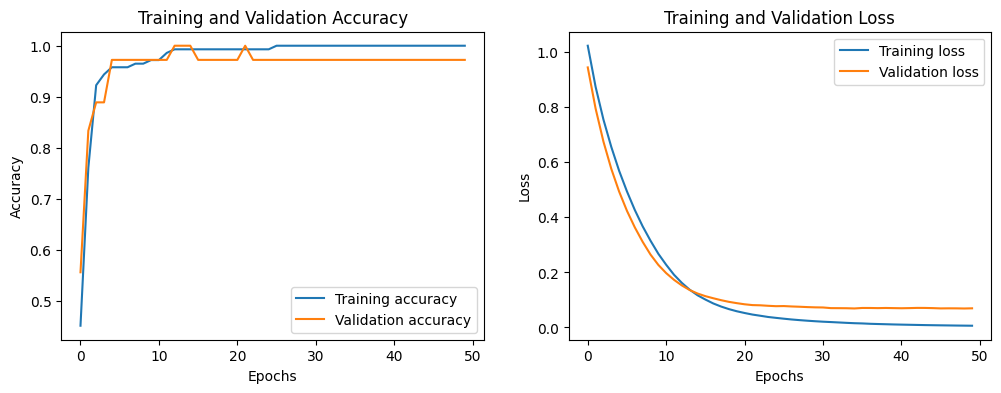

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted Class : 0, Actual Class: 0


In [19]:
# The Wine dataset from Scikit-Learn contains 178 samples with 13 numerical features,
# such as alcohol content, flavonoids, and phenols, representing different chemical properties of wines.
# The goal is to classify wines into three types (Class 0, 1, and 2) based on their composition.
# It originates from the UCI Machine Learning Repository and is commonly used for multiclass classification tasks

import tensorflow as tf
from tensorflow.keras import layers,models
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Load dataset
data = load_wine()
X,y = data.data,data.target

# Split dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# Normalize features using Z-score standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a neural network model
model = models.Sequential([
    layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    layers.Dense(32,activation='relu'),
    layers.Dense(3,activation='softmax') # Multiclass classification - 3 output classes (0, 1, 2)
])
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train model
history = model.fit(X_train,y_train,epochs=50,batch_size=32,verbose=1,validation_data=(X_test,y_test))

# Evaluate model
test_loss,test_accuracy = model.evaluate(X_test,y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

# Plot training history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

# Predict Sample
sample_prediction = np.expand_dims(X_test[0],axis=0)
predicted_class = np.argmax(model.predict(sample_prediction)) # np.argmax() is used to pick the index of the highest probability — i.e. the predicted class in multi-class classification.
print(f'Predicted Class : {predicted_class}, Actual Class: {y_test[0]}')

# Using stratify=y ensures that the proportion of each class remains the same in both training and testing sets,
# leading to a more balanced and representative split.

# Example: Without stratify=y
# If you have a dataset with 80% Class 0, 15% Class 1, and 5% Class 2,
# a random split without stratification might result in:

# Training set: 90% Class 0, 8% Class 1, 2% Class 2
# Test set: 60% Class 0, 30% Class 1, 10% Class 2

# This skews the distribution, leading to poor generalization.

# Example: With stratify=y

# Training set: 80% Class 0, 15% Class 1, 5% Class 2
# Test set: 80% Class 0, 15% Class 1, 5% Class 2

# This ensures a balanced representation of all classes in both sets.

# Always use stratify=y when working with classification problems, especially when your dataset has an unequal class distribution.
